Definindo as bibliotecas 

In [28]:
import numpy as np
import pandas as pd 
import time
import os
import matplotlib.pyplot as plt 
import seaborn as sns

Definindo os parâmetros

In [29]:
L = 1.0           # Comprimento da barra (m)
u = 0.1           # Velocidade de advecção (m/s)
n = 101           # Número de nós no espaço
dt = 0.05         # Passo de tempo (s)
t_total = 5.0     # Tempo total de simulação (s)

# Condições Físicas
T_init = 20.0  # Temperatura inicial da barra
T_contorno= 100.0 # Condição de contorno em x=0 (Dirichlet)

Definindo função principal

In [30]:
def adveccao(L,u,n,dt,t_total,T_i,T_cont):
    dx= L/(n-1) 
    C= u*dt/dx
    x= np.linspace(0,L,n)
    t_atual=np.full((n,),T_i)
    t_futuro=np.zeros((n,))
    t_atual[0]= T_cont
    tempos= int(t_total/dt)
    historico = []
    for k in range(tempos):
        for i in range(1,n):
            t_futuro[i]= t_atual[i]- C*(t_atual[i]- t_atual[i-1])
        t_futuro[0]= T_cont
        t_futuro[-1]= t_atual[-2] 
        t_atual= t_futuro.copy()
        historico.append(t_atual.copy())
    return x, historico

Executando a função

In [31]:
x , historico = adveccao(L,u,n,dt,t_total,T_init,T_contorno)
y=np.array(historico)
print(y.shape)
print (y)


(100, 101)
[[100.  60.  20. ...  20.  20.  20.]
 [100.  80.  40. ...  20.  20.  20.]
 [100.  90.  60. ...  20.  20.  20.]
 ...
 [100. 100. 100. ...  20.  20.  20.]
 [100. 100. 100. ...  20.  20.  20.]
 [100. 100. 100. ...  20.  20.  20.]]


fazendo dataframe e arquivos com os dados da simulação

In [32]:
resultados_ns = pd.DataFrame()

fazendo heatmap da dispersão de calor

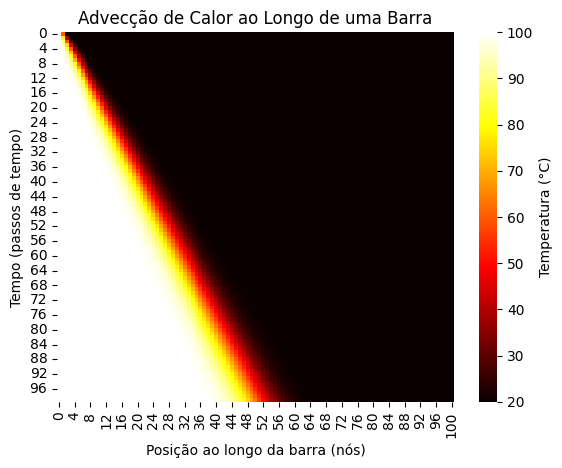

In [33]:
sns.heatmap(y, cmap='hot', cbar_kws={'label': 'Temperatura (°C)'})
plt.xlabel('Posição ao longo da barra (nós)')
plt.ylabel('Tempo (passos de tempo)')
plt.title('Advecção de Calor ao Longo de uma Barra')
plt.show()

Grafico da simulção

In [38]:
# --- Simulação INSTÁVEL (Proposital) ---

# Vamos aumentar o passo de tempo para violar a condição CFL
# Se dx = 0.01 e u = 0.1, o limite é dt <= 0.1.
# Vamos usar dt = 0.11 para forçar o erro (C = 1.1).

dt_instavel = 0.11 

print(f"Testando Estabilidade com dt = {dt_instavel}...")

# Rodar o solver com o dt "ruim"
# Nota: Pode ser que o python solte um aviso de "overflow" (número muito grande), é normal aqui.
try:
    x_inst, hist_inst = adveccao(L_exemplo, u_exemplo, n_exemplo, dt_instavel, 
                                 2.0, T_ini_exemplo, T_cont_exemplo) # Simula só 2 segundos

    # Plotar o desastre
    plt.figure(figsize=(10, 6))
    
    # Pegamos apenas alguns instantes, pois logo vai explodir
    tempos_para_ver = list(hist_inst.keys())[:10] # Primeiros 10 passos

    for t in tempos_para_ver:
        plt.plot(x_inst, hist_inst[t], label=f't={t:.2f}s')

    plt.title(f"Demonstração de Instabilidade (CFL > 1)")
    plt.xlabel("Posição x [m]")
    plt.ylabel("Temperatura [°C]")
    plt.legend()
    plt.grid(True)
    plt.show()
    
except Exception as e:
    print(f"Ocorreu um erro matemático (como esperado): {e}")

Testando Estabilidade com dt = 0.11...
Ocorreu um erro matemático (como esperado): name 'L_exemplo' is not defined


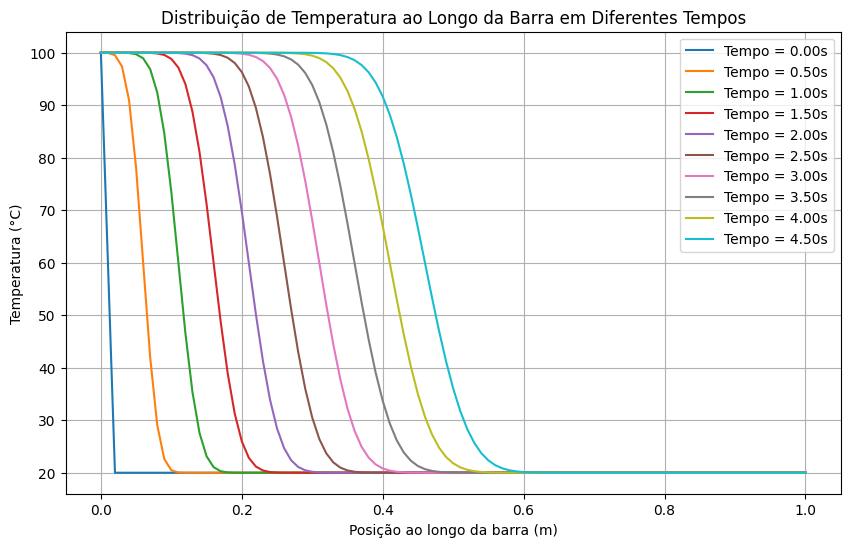

In [34]:
plt.figure(figsize=(10,6))
for i in range(0, len(y), max(1, len(y)//10)):
    plt.plot(np.linspace(0, L, n), y[i], label=f'Tempo = {dt*i:.2f}s')
plt.xlabel('Posição ao longo da barra (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribuição de Temperatura ao Longo da Barra em Diferentes Tempos')
plt.legend()
plt.grid(True)
plt.show()